# Understanding GroupBy in Depth

1. Simple groupby, inbuilt aggregations
3. Apply custom aggregates on grouped objects with loops

In [11]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
import datetime

## Inbuilt aggregations on groupby

In [12]:
df = pd.DataFrame({
    'product': ['a', 'b','a', 'c', 'a', 'b', 'b'],
    'sales': np.random.randint(10, 100, 7),
    'date': ['2020/01/15', '2020/01/15', '2020/01/12', '2020/01/30', '2020/02/05', '2020/02/06', '2020/02/15']
})
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
df

,product,sales,date
0,a,86,2020-01-15
1,b,18,2020-01-15
2,a,23,2020-01-12
3,c,18,2020-01-30
4,a,52,2020-02-05
5,b,78,2020-02-06
6,b,82,2020-02-15


**Note**
- If u use groupby using agg function, it will return a pandas dataframe(as in method1)
- If u use groupby without agg function, it will return a pandas series(as in method2)

In [22]:
# Method1

# in agg {key : value}, key should be column u want to aggregate & value should be a function/custom function.
# groupby will return a dataframe when it is used with agg function.
b1 = df.groupby(['product']).agg({'sales': sum})
print(type(b1))
b1


<class 'pandas.core.frame.DataFrame'>


,sales
product,
a,161
b,178
c,18


In [23]:
b1.index    # product is index and sales is column in pandas dataframe

Index(['a', 'b', 'c'], dtype='object', name='product')

In [24]:
# Method2

b2 = df.groupby('product')['sales'].sum()
print(type(b2))
b2

<class 'pandas.core.series.Series'>


product
a    161
b    178
c     18
Name: sales, dtype: int64

**Note**

- If u want to groupby multiple columns then u need to provide columns in a list.
- The inbuilt aggregate functions can be sum, min, max, mean etc

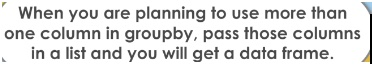

In [28]:
# M1, groupby 2 categories, so multiindex - returns a dataframe

x = df.groupby(['product', 'date']).agg({'sales': sum})
print(type(x))
x

<class 'pandas.core.frame.DataFrame'>


sales
product date             
a       2020-01-12     23
        2020-01-15     86
        2020-02-05     52
b       2020-01-15     18
        2020-02-06     78
        2020-02-15     82
c       2020-01-30     18

In [29]:
# Returns a series

y = df.groupby(['product', 'date'])['sales'].sum()
print(type(y))
y

<class 'pandas.core.series.Series'>


product  date      
a        2020-01-12    23
         2020-01-15    86
         2020-02-05    52
b        2020-01-15    18
         2020-02-06    78
         2020-02-15    82
c        2020-01-30    18
Name: sales, dtype: int64

## Custom aggregations on groupby 

- Sometimes inbuilt aggregate functions like sum, min, max, mean, count may not be enough.
- Might need custom functions to achieve business logic.


#### Calculate product wise average no. days between purchases

In [30]:
df

,product,sales,date
0,a,86,2020-01-15
1,b,18,2020-01-15
2,a,23,2020-01-12
3,c,18,2020-01-30
4,a,52,2020-02-05
5,b,78,2020-02-06
6,b,82,2020-02-15


**Note**

- Whenever u apply for loop on grouped objects u can extract 2 elements- 1st name of those grouped categories and 2nd dataframe that belongs to those categories.
- Name of categories given by index.
- Dataframes for each category given by group.

In [34]:
for index, group in df.groupby(['product']):
    print(index)

a
b
c


In [35]:
for index, group in df.groupby(['product']):
    print(group)


  product  sales       date
0       a     86 2020-01-15
2       a     23 2020-01-12
4       a     52 2020-02-05
  product  sales       date
1       b     18 2020-01-15
5       b     78 2020-02-06
6       b     82 2020-02-15
  product  sales       date
3       c     18 2020-01-30


In [36]:
for index, group in df.groupby(['product']):
    print(index)
    display(group)
    print('----')

a


,product,sales,date
0,a,86,2020-01-15
2,a,23,2020-01-12
4,a,52,2020-02-05


----
b


,product,sales,date
1,b,18,2020-01-15
5,b,78,2020-02-06
6,b,82,2020-02-15


----
c


,product,sales,date
3,c,18,2020-01-30


----


- **.diff() can calculate difference b/w consecutive rows as shown below**
- Missing value in date column given by NaT- Not a Time as for 1st row there will be no difference.

In [37]:
for index, group in df.groupby(['product']):
    print(index)
    group = group.sort_values('date')
    group['dates_diff'] = group['date'].diff()
    display(group)

a


,product,sales,date,dates_diff
2,a,23,2020-01-12,NaT
0,a,86,2020-01-15,3 days
4,a,52,2020-02-05,21 days


b


,product,sales,date,dates_diff
1,b,18,2020-01-15,NaT
5,b,78,2020-02-06,22 days
6,b,82,2020-02-15,9 days


c


,product,sales,date,dates_diff
3,c,18,2020-01-30,NaT


- Formatting dates_diff to get just the number, e.g. 22 from 22days, and then calculate avg.

In [24]:
for index, group in df.groupby(['product']):
    print(index)
    group = group.sort_values('date')
    group['dates_diff'] = group['date'].diff().dt.days
    display(group)

a


,product,sales,date,dates_diff
2,a,70,2020-01-12,NaN
0,a,71,2020-01-15,3.0
4,a,46,2020-02-05,21.0


b


,product,sales,date,dates_diff
1,b,77,2020-01-15,NaN
5,b,38,2020-02-06,22.0
6,b,30,2020-02-15,9.0


c


,product,sales,date,dates_diff
3,c,65,2020-01-30,NaN


- Calculating average of difference in sales of each product. 

In [38]:
for index, group in df.groupby(['product']):
    group = group.sort_values('date')
    group['dates_diff'] = group['date'].diff().dt.days
    print(index, group['dates_diff'].mean())

a 12.0
b 15.5
c nan


### Custom function to get avg of, difference in sales of each product

In [40]:
def get_days_diff(group):
    group = group.sort_values('date')
    group['dates_diff'] = group['date'].diff().dt.days
    return group['dates_diff'].mean()

### Apply this custom function on grouped object 

- For inbuilt function we use agg e.g. b1 = df.groupby(['product']).agg({'sales': sum})
- For custom function we use apply with the grouped object.

In [74]:
# Input is the dataframes returned from ''for index, group in df.groupby(['product'])''

df.groupby(['product']).apply(get_days_diff)

product
a    12.0
b    15.5
c     NaN
dtype: float64

In [75]:
summary = df.groupby(['product']).apply(get_days_diff)
summary

product
a    12.0
b    15.5
c     NaN
dtype: float64

In [76]:
print(type(summary))

<class 'pandas.core.series.Series'>


**Give name to Series**
- product is index here and avg_days_bwt_purchase is name you give to series i.e. values

In [77]:
summary.name = 'avg_days_bwt_purchase'
summary

product
a    12.0
b    15.5
c     NaN
Name: avg_days_bwt_purchase, dtype: float64

- To change series to df i.e. index of series which is product changes to column of a dataframe.


In [79]:
# To change series to df i.e. index of series change to column of a dataframe.

sum1 = summary.reset_index()
sum1

,product,avg_days_bwt_purchase
0,a,12.0
1,b,15.5
2,c,NaN


In [69]:
print(type(sum1))

<class 'pandas.core.frame.DataFrame'>
